In [1]:
# importando o dataset
from sklearn.datasets import load_iris
X,y = load_iris( return_X_y= True, as_frame=True )

In [2]:
# considerando as duas colunas de pétala os targets 0 e 1
X = X.loc[y.isin([0,1]), ['petal length (cm)', 'petal width (cm)']]
y = y[y.isin([0,1])]

In [3]:
# separando em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

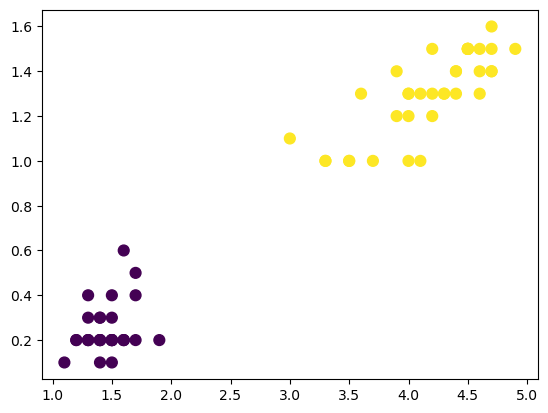

In [4]:
# visualizando graficamente
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train, s=60)

plt.show()

In [5]:
# importando o SVC
from sklearn.svm import SVC

In [8]:
# criando o classificador e já fazendo o fit com os dados
clf = SVC(kernel='linear').fit(x_train, y_train)

In [9]:
# visualizando o coef
clf.coef_

array([[1.1769056 , 0.78337144]])

In [12]:
# separando o w1
w1 = clf.coef_[0][0]

In [13]:
# e o w2
w2 = clf.coef_[0][1]

In [15]:
# e agora utilizando o intercept_ como w0
w0 = clf.intercept_[0]

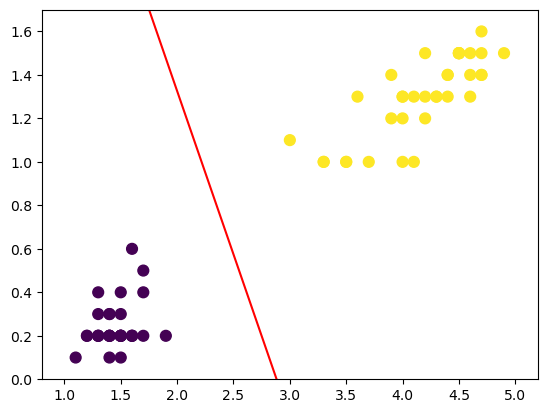

In [18]:
# traçando essa reta no gráfico
fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train, s=60)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x,y, 'r')

ax.set(ylim=(0,1.7))

plt.show()

In [19]:
# além disso, também podemos ver quais foram os vetores de suporte utilizados para traçar essa reta
clf.support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

In [20]:
# pegando os valores de x
clf.support_vectors_[:,0]

array([1.9, 1.7, 3. ])

In [21]:
# e os valores de y
clf.support_vectors_[:,1]

array([0.2, 0.5, 1.1])

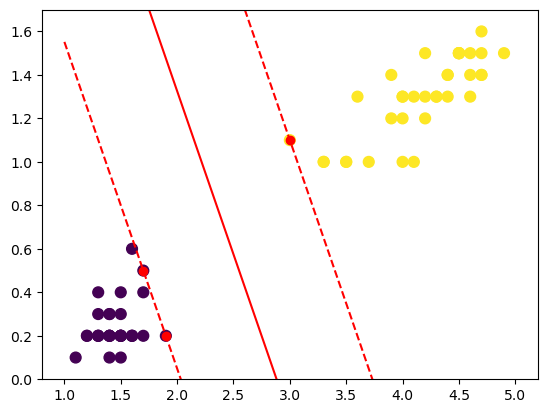

In [25]:
# visualizando esses pontos

fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train, s=60)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x,y, 'r')
y2 = (+1-w1*x-w0)/w2
ax.plot(x,y2, '--r')
y3 = (-1-w1*x-w0)/w2
ax.plot(x,y3, '--r')

ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c='r')

ax.set(ylim=(0,1.7))

plt.show()

In [26]:
# importando o dataset novamente
X,y = load_iris( return_X_y= True, as_frame=True )

In [27]:
# separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [28]:
# criando o classificador
clf2 = SVC().fit(x_train,y_train)

In [31]:
# fazendo a previsão
y_pred = clf2.predict(x_test)

In [32]:
# e analisando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0